Este trecho importa cinco bibliotecas essenciais:

1. **random**: Gera números aleatórios para simulações e amostras.
2. **copy**: Usada para copiar objetos.
2. **time**: Trabalha com o tempo, útil para medir o tempo de execução ou criar pausas no código.
3. **numpy (np)**: Realiza operações matemáticas e manipulação de arrays de forma eficiente.
4. **matplotlib.pyplot (plt)**: Cria gráficos e visualizações de dados de maneira simples.

Essas bibliotecas são fundamentais em análises de dados e simulações.


In [90]:
import random
import copy
import time
import numpy as np
import matplotlib.pyplot as plt

A função `calcular_conflitos` calcula o número de "conflitos" em uma solução.

- **Entrada**: Recebe uma lista `tabuleiro`, onde cada índice representa uma linha e o valor no índice representa a coluna de uma rainha.
- **Processo**:
  - Itera sobre todos os pares de rainhas (i, j) para verificar:
    - Se estão na mesma linha (`tabuleiro[i] == tabuleiro[j]`).
    - Se estão na mesma diagonal (`abs(tabuleiro[i] - tabuleiro[j]) == abs(i - j)`).
  - Incrementa `conflitos` para cada conflito detectado.
- **Saída**: Retorna o valor total de conflitos.

Essa função é útil para avaliar a qualidade de uma solução no contexto de problemas de otimização.


In [91]:
def calcular_conflitos(tabuleiro):
    conflitos = 0
    n = len(tabuleiro) 

    for i in range(n):
        for j in range(i + 1, n): 
            if tabuleiro[i] == tabuleiro[j]: # Conflito na mesma linha
                conflitos += 1
            if abs(tabuleiro[i] - tabuleiro[j]) == abs(i - j): # Conflito na mesma diagonal
                conflitos += 1

    return conflitos

A função `gerar_vizinho` cria uma derivação aleatória do tabuleiro atual.

- **Entrada**:
  - `tabuleiro`: posição atual das rainhas no tabuleiro.
- **Processo**:
  - Faz uma cópia do tabuleiro atual.
  - Utiliza `random.randint` no intervalo de 0 até n -1 para escolher aleatoriamente uma rainha (coluna) para mover de posição (linha).
  - Garante que a nova linha seja diferente da linha atual.
- **Saída**: Retorna uma lista com o vizinho gerado, onde cada elemento é uma solução possível.

Essa função é útil para encontrar novas possíveis soluções.


In [92]:
def gerar_vizinho(tabuleiro):
    n = len(tabuleiro)
    novoTabuleiro = copy.copy(tabuleiro) 

    coluna = random.randint(0, n - 1) # Escolhe aleatoriamente uma coluna para mover a rainha
    linha = random.randint(0, n - 1) # Escolhe aleatoriamente uma nova linha para a rainha na coluna selecionada

    while novoTabuleiro[coluna] == linha: # Garante que a nova linha seja diferente da linha atual da rainha na coluna escolhida
        linha = random.randint(0, n - 1)
    
    novoTabuleiro[coluna] = linha
    return novoTabuleiro

A função `stochastic_hill_climbing` é a função principal do algoritmo de busca local.

- **Entrada**:
  - `iteracoes`: número de iterações máximo que o algoritmo fará, valor padrão é 1000.
- **Processo**:
  - Gera um tabuleiro aleatoriamente, nesse caso de tamanho 8.
  - Realiza o cálculo de quantos conflitos há no tabuleiro, por meio do método `calcular_conflitos`
  - Inicia a contagem do tempo de execução do algoritmo.
  - Repetidademente, gera vizinhos e calcula a nova quantidade de conflitos
      - Caso seja uma solução mais promissora, atualiza o tabuleiro e os conflitos
      - Esse processo se repete até que se encontre uma solução sem conflitos ou o número de iterações máximo seja atingido
- **Saída**: Retorna uma solução, a quantidade de conflitos, o tempo de execução e quantas iterações foram feitas.

In [93]:
def stochastic_hill_climbing(iteracoes=1000):
    tabuleiro = [random.randint(0, 7) for _ in range(8)]
    conflitos = calcular_conflitos(tabuleiro)
    tempo_inicial = time.time()
    tempo_execucao = 0

    for i in range(iteracoes):
        if conflitos == 0:  # Se encontrou uma solução sem conflitos, para
            break
        
        vizinho = gerar_vizinho(tabuleiro)
        novosConflitos = calcular_conflitos(vizinho)

        if novosConflitos < conflitos: # Se encontrou uma combinação diferente com menos conflitos, atualiza o tabuleiro
            tabuleiro = vizinho
            conflitos = novosConflitos
    tempo_execucao = time.time() - tempo_inicial
    return tabuleiro, conflitos, tempo_execucao, i

### Fluxo do Hill Climbing Stochastic

#### A representação gráfica está no arquivo `fluxograma_stochastic_hill_climbing.pdf`

1. Gera solução inicial aleatória
    - Cria um tabuleiro com 8 rainhas posicionadas aleatoriamente (uma por coluna).

2. Calcula o fitness inicial
    - Conta o número de conflitos (pares de rainhas se atacando).

3. Inicializa contador de estagnação
    - contador_estagnacao = 0 (registra iterações sem melhoria).

4. Verifica solução ótima
    - Se fitness_atual == 0, retorna a solução (todas as rainhas estão seguras).
    - É o critério de parada antecipada.

5. Verifica estagnação
    - Se contador_estagnacao >= 500, retorna a melhor solução encontrada até então.
    - É o critério de parada por falta de progresso.

6. Gera um vizinho aleatório
    - Escolhe uma coluna aleatória e move a rainha para uma nova linha diferente.

7. Calcula o fitness do vizinho
    - Conta os conflitos da nova configuração.

8. Compara fitness
    - Se fitness_vizinho < fitness_atual, atualiza a solução atual para o vizinho e zera o contador de estagnação.
    - Caso contrário, incrementa o contador de estagnação.

9. Repete o loop
    - Retorna ao passo 2 até que um dos critérios de parada sejam atingidos

10. Retorna a solução
    - Se encontrou solução ótima (fitness = 0), o tabuleiro está sem conflitos
    - Caso contrário, retorna a melhor solução encontrada

### Execução Repetida do Hill Climbing Stochastic e Análise dos Resultados

1. **Execução do Algoritmo**:
   - O algoritmo é executado 50 vezes.
   - A cada execução, são armazenados:
     - O número de conflitos (`conflitos`).
     - O tempo de execução (`tempos`).
     - O número de iterações (`iteracoes`).

2. **Cálculos Estatísticos**:
   - **Média e Desvio Padrão**:
     - A média e o desvio padrão do número de conflitos, de iterações e do tempo de execução são calculados utilizando o `numpy`.
     - **Exibição**: São impressos os valores da média e desvio padrão de conflitos, de iterações e do tempo de execução.
   
3. **Visualização**:
   - **Gráfico do Número de Conflitos**:
     - Um histograma é gerado para mostrar a distribuição do número de conflitos.
   - **Gráfico do Tempo de Execução**:
     - Um histograma é gerado para mostrar a distribuição do tempo de execução.
   - **Gráfico do Número de Iterações**:
     - Um histograma é gerado para mostrar a distribuição do número de iterações.

### Resultados:
- **Média e Desvio Padrão**:
  - A média e o desvio padrão dos conflitos, do tempo de execução e das iterações ajudam a entender a consistência do algoritmo.
  
### Gráficos:
- **Histograma do Número de Conflitos**:
  - Mostra a distribuição do número de conflitos encontrados em cada execução.
- **Histograma do Tempo de Execução**:
  - Mostra a distribuição do tempo de execução do algoritmo em cada execução.
- **Histograma do Número de Iterações**:
  - Mostra a distribuição do número de iterações realizadas em cada execução.


Execução 0
Execução 1
Execução 2
Execução 3
Execução 4
Execução 5
Execução 6
Execução 7
Execução 8
Execução 9
Execução 10
Execução 11
Execução 12
Execução 13
Execução 14
Execução 15
Execução 16
Execução 17
Execução 18
Execução 19
Execução 20
Execução 21
Execução 22
Execução 23
Execução 24
Execução 25
Execução 26
Execução 27
Execução 28
Execução 29
Execução 30
Execução 31
Execução 32
Execução 33
Execução 34
Execução 35
Execução 36
Execução 37
Execução 38
Execução 39
Execução 40
Execução 41
Execução 42
Execução 43
Execução 44
Execução 45
Execução 46
Execução 47
Execução 48
Execução 49
Média de conflitos: 1.42
Desvio padrão de conflitos: 0.6954135460285484
Média do tempo de execução: 0.0034 segundos
Desvio padrão do tempo de execução: 0.0009 segundos
Média de iterações: 926.04
Desvio padrão de iterações: 247.53245928564604


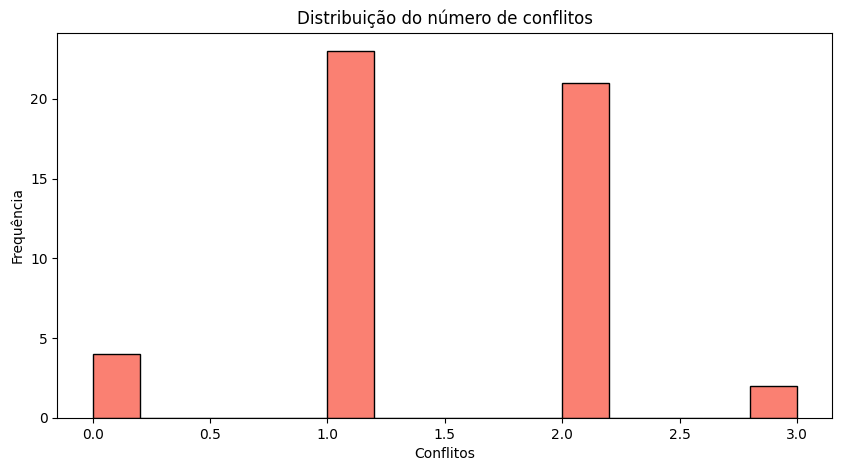

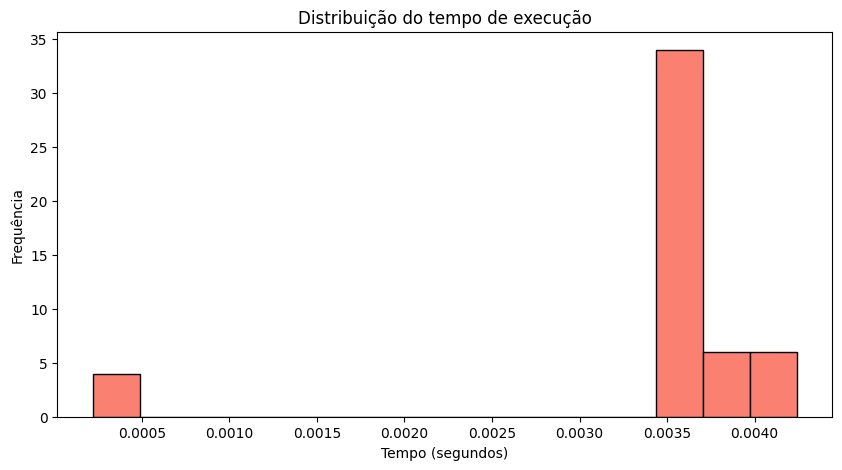

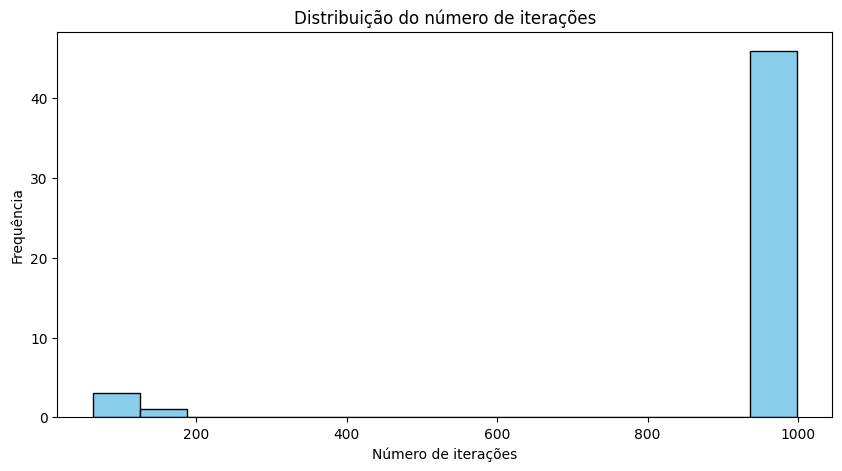

In [94]:
# Executar 50 vezes
solucoes = []
conflitos = []
tempos = []
iteracoes = []

for i in range(50):
    print(f"Execução {i}")
    solucao, totalConflitos, tempo, i = stochastic_hill_climbing()
    solucoes.append(solucao)
    conflitos.append(totalConflitos)
    tempos.append(tempo)
    iteracoes.append(i)

# Calcular médias e desvios padrão
media_conflitos = np.mean(conflitos)
desvio_conflitos = np.std(conflitos)

media_tempos = np.mean(tempos)
desvio_tempos = np.std(tempos)

media_iteracoes = np.mean(iteracoes)
desvio_iteracoes = np.std(iteracoes)

print(f'Média de conflitos: {media_conflitos}')
print(f'Desvio padrão de conflitos: {desvio_conflitos}')

print(f'Média do tempo de execução: {media_tempos:.4f} segundos')
print(f'Desvio padrão do tempo de execução: {desvio_tempos:.4f} segundos')

print(f'Média de iterações: {media_iteracoes}')
print(f'Desvio padrão de iterações: {desvio_iteracoes}')


# Gráfico do número de conflitos
plt.figure(figsize=(10, 5))
plt.hist(conflitos, bins=15, color='salmon', edgecolor='black')
plt.title("Distribuição do número de conflitos")
plt.xlabel("Conflitos")
plt.ylabel("Frequência")
plt.show()

# Gráfico do tempo de execução
plt.figure(figsize=(10, 5))
plt.hist(tempos, bins=15, color='salmon', edgecolor='black')
plt.title("Distribuição do tempo de execução")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Frequência")
plt.show()

# Gráfico do número de iterações
plt.figure(figsize=(10, 5))
plt.hist(iteracoes, bins=15, color='skyblue', edgecolor='black')
plt.title("Distribuição do número de iterações")
plt.xlabel("Número de iterações")
plt.ylabel("Frequência")
plt.show()

### Melhores Soluções alcançadas

- **Cinco Melhores Soluções**:
  - As melhores soluções são aquelas que apresentam o menor número de conflitos, indicando que o algoritmo encontrou soluções mais próximas da ideal.
  - Foram encontradas ordenando as soluções pelo número de conflitos e selecionando as 5 primeiras do vetor gerado.

In [95]:
solucoes_otimas = sorted(zip(solucoes, conflitos), key= lambda x: x[1])
sol = []
for s in solucoes_otimas:
    if s[0] not in sol:
        sol.append(s)

print("Soluções ótimas")
sol = sol[:5]
for i in range(len(sol)):
    print(f"Solução {i+1}: {sol[i][0]}")

Soluções ótimas
Solução 1: [7, 2, 0, 5, 1, 4, 6, 3]
Solução 2: [5, 2, 0, 7, 4, 1, 3, 6]
Solução 3: [4, 6, 3, 0, 2, 7, 5, 1]
Solução 4: [2, 4, 1, 7, 5, 3, 6, 0]
Solução 5: [1, 2, 5, 7, 4, 0, 3, 6]
